In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_NN_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,0,NaN,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,NaN,0,NaN,-0.18829,NaN,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,NaN,-0.18401,-0.19040,-0.11593,NaN,-0.06288,-0.13738,-0.02447
2,NaN,0,NaN,NaN,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1.0,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,NaN,-0.32382,1.00000
4,1.0,0,1.00000,-0.02401,NaN,0.06531,0.92106,-0.23255,0.77152,NaN,...,0.03286,NaN,0.13290,NaN,0.02431,-0.62197,NaN,-0.59573,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0,0.83508,0.08298,NaN,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,NaN,0,0.95113,NaN,NaN,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,NaN,NaN,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1.0,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,NaN,...,0.93988,NaN,0.92489,0.02542,0.92120,0.02242,NaN,0.00442,0.92697,-0.00577
349,1.0,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	70
int64		column 2	0
float64		column 3	104
float64		column 4	70
float64		column 5	70
float64		column 6	34
float64		column 7	68
float64		column 8	68
float64		column 9	102
float64		column 10	102
float64		column 11	104
float64		column 12	70
float64		column 13	0
float64		column 14	102
float64		column 15	34
float64		column 16	68
float64		column 17	36
float64		column 18	104
float64		column 19	68
float64		column 20	70
float64		column 21	0
float64		column 22	104
float64		column 23	138
float64		column 24	138
float64		column 25	0
float64		column 26	70
float64		column 27	104
float64		column 28	68
float64		column 29	34
float64		column 30	70
float64		column 31	70
float64		column 32	70
float64		column 33	68
float64		column 34	68


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,281.000000,351.0,247.000000,281.000000,281.000000,317.000000,283.000000,283.000000,249.000000,249.000000,...,351.000000,281.00000,247.000000,283.000000,317.000000,281.000000,281.000000,281.000000,283.000000,283.000000
mean,0.896797,0.0,0.691218,0.025562,0.613041,0.107702,0.571524,0.089016,0.540612,0.182785,...,0.396135,-0.07189,0.566048,-0.047912,0.384442,-0.022498,0.355396,-0.006477,0.366256,0.010437
std,0.304766,0.0,0.413954,0.398618,0.513850,0.444781,0.475089,0.485776,0.456995,0.420535,...,0.578451,0.47842,0.459045,0.522268,0.563205,0.464618,0.534156,0.478434,0.485652,0.419004
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.544270,-0.058890,0.446810,-0.024390,0.318865,-0.056135,0.219910,-0.017340,...,0.000000,-0.27734,0.349730,-0.244910,0.000000,-0.210530,0.000000,-0.215690,0.000000,-0.105730
50%,1.000000,0.0,0.870320,0.014030,0.819270,0.017560,0.729900,0.005100,0.666670,0.023040,...,0.553890,-0.01478,0.652470,-0.012370,0.496640,0.000000,0.430260,0.000000,0.421890,0.000000
75%,1.000000,0.0,0.993350,0.154510,1.000000,0.293080,0.949880,0.280115,0.935820,0.351970,...,0.905240,0.14079,0.965715,0.149915,0.875970,0.112180,0.817100,0.159300,0.787270,0.123850
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

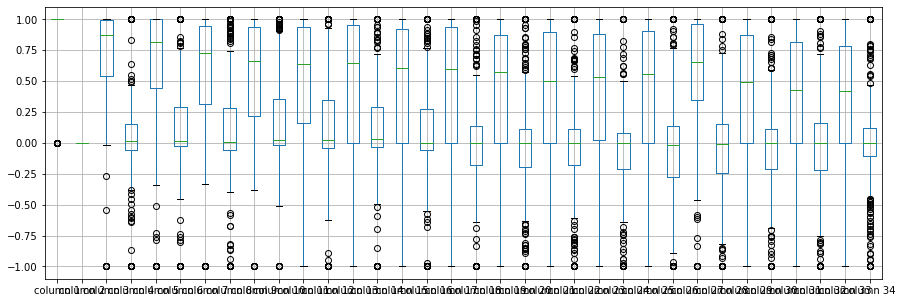

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.896797
column 2     0.000000
column 3     0.691218
column 4     0.025562
column 5     0.613041
column 6     0.107702
column 7     0.571524
column 8     0.089016
column 9     0.540612
column 10    0.182785
column 11    0.492480
column 12    0.132604
column 13    0.400801
column 14    0.096868
column 15    0.361454
column 16    0.081328
column 17    0.407063
column 18   -0.006203
column 19    0.385802
column 20   -0.006075
column 21    0.336695
column 22   -0.016036
column 23    0.430801
column 24   -0.076586
column 25    0.396135
column 26   -0.071890
column 27    0.566048
column 28   -0.047912
column 29    0.384442
column 30   -0.022498
column 31    0.355396
column 32   -0.006477
column 33    0.366256
column 34    0.010437
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.220726,0.132033,0.103311,0.121971,0.228145,0.106967,0.183802,-0.110624,...,0.080246,0.013251,-0.296977,0.045900,0.097844,-0.060728,0.222534,-0.067612,0.046401,0.009303
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.220726,NaN,1.000000,0.101328,0.464672,0.011881,0.462166,0.047877,0.464482,0.082381,...,0.382629,-0.129272,0.096157,0.192715,0.357208,-0.014975,0.190386,0.014120,0.284976,-0.058018
column 4,0.132033,NaN,0.101328,1.000000,0.031362,-0.018344,-0.023096,0.446479,-0.322709,0.170794,...,-0.152518,-0.228039,-0.028105,0.007473,-0.084410,0.340274,-0.143807,-0.148670,-0.145646,-0.048636
column 5,0.103311,NaN,0.464672,0.031362,1.000000,0.060847,0.621934,-0.117902,0.341731,-0.037053,...,0.234208,-0.065305,0.125491,0.285798,0.247943,0.010079,0.385967,0.124013,0.356941,-0.019308
column 6,0.121971,NaN,0.011881,-0.018344,0.060847,1.000000,0.073435,0.162528,-0.102549,0.313561,...,-0.212883,0.146876,-0.189246,-0.137941,-0.044471,-0.100296,-0.149731,0.290580,0.024521,0.176693
column 7,0.228145,NaN,0.462166,-0.023096,0.621934,0.073435,1.000000,-0.196810,0.451303,-0.192740,...,0.282647,0.014901,0.102795,0.111433,0.312139,-0.005380,0.325370,-0.009362,0.512031,-0.088913
column 8,0.106967,NaN,0.047877,0.446479,-0.117902,0.162528,-0.196810,1.000000,-0.290137,0.346165,...,-0.175819,-0.096181,-0.275237,0.010894,-0.205379,0.202147,-0.246162,0.128149,-0.233335,0.210304
column 9,0.183802,NaN,0.464482,-0.322709,0.341731,-0.102549,0.451303,-0.290137,1.000000,-0.313122,...,0.339677,0.143311,0.109064,0.153814,0.264351,0.084743,0.300586,0.150673,0.211394,-0.050037
column 10,-0.110624,NaN,0.082381,0.170794,-0.037053,0.313561,-0.192740,0.346165,-0.313122,1.000000,...,-0.339207,0.043300,-0.280313,-0.083073,-0.213059,0.012856,-0.119952,-0.083054,-0.270883,0.071751


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+32,34+32+32,34+32+32+32,34+32+32+32+32,34+32+32+32,34+32+32,34+32,34], vae_layer = False, seed = 320)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 15.554085867745536
Epoch: 1 , loss: 15.508851823352632
Epoch: 2 , loss: 15.448536418733143
Epoch: 3 , loss: 15.528080894833518
Epoch: 4 , loss: 15.317633992149716
Epoch: 5 , loss: 15.290492103213357
Epoch: 6 , loss: 15.137032463437034
Epoch: 7 , loss: 15.22993314833868
Epoch: 8 , loss: 15.190296763465518
Epoch: 9 , loss: 14.999988828386579
Epoch: 10 , loss: 14.624848320370628
Epoch: 11 , loss: 14.12634717850458
Epoch: 12 , loss: 13.443453425452823
Epoch: 13 , loss: 13.390785035632906
Epoch: 14 , loss: 13.164812632969447
Epoch: 15 , loss: 13.112454005650111
Epoch: 16 , loss: 13.17121664683024
Epoch: 17 , loss: 13.14017713637579
Epoch: 18 , loss: 13.09686633518764
Epoch: 19 , loss: 13.18256037575858
Epoch: 20 , loss: 12.97169117700486
Epoch: 21 , loss: 13.119576181684222
Epoch: 22 , loss: 13.05610770270938
Epoch: 23 , loss: 13.056596211024694
Epoch: 24 , loss: 12.894988968258811
Epoch: 25 , loss: 13.0903

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.000000
column 2     0.000000
column 3     1.000000
column 4     1.000000
column 5    -0.043272
column 6     0.000000
column 7     0.000000
column 8     0.000000
column 9    -0.044434
column 10    0.021418
column 11    0.000000
column 12    0.000000
column 13    0.000000
column 14    0.000000
column 15   -0.063331
column 16   -1.000000
column 17   -1.000000
column 18    0.002844
column 19   -1.000000
column 20    1.000000
column 21   -1.000000
column 22    1.000000
column 23    0.000000
column 24   -0.003140
column 25    0.000000
column 26    0.000000
column 27    1.000000
column 28   -0.012597
column 29   -1.000000
column 30    1.000000
column 31   -1.000000
column 32    1.000000
column 33   -0.038504
column 34   -0.002385
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.000000,0,-0.325890,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,-0.833381,0,-0.854173,0.000000,-0.794985,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.000000,0.331545,0.000000,0.0,0.0,0.261955,0.000000,0.000000,0.000000
2,-0.262514,0,-0.344043,0.007434,0.000000,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,-1.000456,0.000000,0.000000
4,0.000000,0,0.000000,0.000000,-0.235562,0.000000,0.0,0.0,0.000000,0.18407,...,0.0,0.607246,0.000000,0.562175,0.0,0.0,0.587599,0.000000,0.575387,0.644599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.000000,0,0.000000,0.000000,-0.161886,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
347,-0.295281,0,0.000000,-0.025070,-0.361459,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,-0.032211,-0.375935,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
348,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00115,...,0.0,-0.098681,0.000000,0.000000,0.0,0.0,-0.195701,0.000000,0.000000,0.000000
349,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

29.364437188310976

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.4289273235662215

In [19]:
new_df.iloc[66,:]

column 1     1.000000
column 2     0.000000
column 3     1.000000
column 4     0.280460
column 5     1.000000
column 6     0.024770
column 7     1.000000
column 8    -0.046423
column 9     1.000000
column 10    0.043170
column 11    0.987620
column 12    0.332660
column 13    1.000000
column 14    0.054890
column 15    1.000000
column 16    0.043840
column 17    0.957500
column 18   -0.021359
column 19    0.843710
column 20   -0.086680
column 21    1.000000
column 22    0.041500
column 23    0.595891
column 24   -0.023438
column 25    1.000000
column 26   -0.390560
column 27    0.964140
column 28   -0.021740
column 29    0.867470
column 30    0.233600
column 31    0.945780
column 32   -0.220210
column 33    0.803550
column 34   -0.073290
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.000000,0,0.669500,-0.058890,0.852430,0.023060,0.83398,-0.37708,1.000000,0.03760,...,0.56811,-0.511710,0.410780,-0.461680,0.21266,-0.34090,0.422670,-0.544870,0.186410,-0.453000
1,0.166619,0,0.145827,-0.188290,0.135365,-0.361560,-0.10868,-0.93597,1.000000,-0.04549,...,-0.20332,-0.265690,0.126865,-0.184010,-0.19040,-0.11593,0.095695,-0.062880,-0.137380,-0.024470
2,0.737486,0,0.655957,-0.026216,1.000000,0.004850,1.00000,-0.12062,0.889650,0.01198,...,0.57528,-0.402200,0.589840,-0.221450,0.43100,-0.17365,0.604360,-0.241800,0.560450,-0.382380
3,1.000000,0,1.000000,-0.451610,1.000000,1.000000,0.71216,-1.00000,0.000000,0.00000,...,1.00000,0.906950,0.516130,1.000000,1.00000,-0.20099,0.256820,-0.000456,-0.323820,1.000000
4,1.000000,0,1.000000,-0.024010,0.705838,0.065310,0.92106,-0.23255,0.771520,0.02008,...,0.03286,-0.044334,0.132900,0.030115,0.02431,-0.62197,0.530529,-0.595730,0.529307,-0.012371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.000000,0,0.835080,0.082980,0.575504,-0.147060,0.84349,-0.05567,0.904410,-0.04622,...,0.95378,-0.042020,0.834790,0.001230,1.00000,0.12815,0.866600,-0.107140,0.905460,-0.043070
347,0.704719,0,0.951130,-0.020880,0.590371,-0.027230,0.93438,-0.01920,0.945900,0.01606,...,0.94520,-0.018601,0.559285,0.049250,0.93159,0.08168,0.940660,-0.000350,0.914830,0.047120
348,1.000000,0,0.947010,-0.000340,0.932070,-0.032270,0.95177,-0.03431,0.955840,0.02561,...,0.93988,-0.066751,0.924890,0.025420,0.92120,0.02242,0.728889,0.004420,0.926970,-0.005770
349,1.000000,0,0.906080,-0.016570,0.981220,-0.019890,0.95691,-0.03646,0.857460,0.00110,...,0.91050,-0.020990,0.891470,-0.077600,0.82983,-0.17238,0.960220,-0.037570,0.874030,-0.162430


In [21]:
imputations[-1].to_excel("Ionosphere_NN_20(imp).xlsx", index=False, header=False)